### **Quick introduction to jupyter notebooks**
* Each cell in this notebook contains either code or text.
* You can run a cell by pressing Ctrl-Enter, or run and advance to the next cell with Shift-Enter.
* Code cells will print their output, including images, below the cell. Running it again deletes the previous output, so be careful if you want to save some results.
* You don't have to rerun all cells to test changes, just rerun the cell you have made changes to. Some exceptions might apply, for example if you overwrite variables from previous cells, but in general this will work.
* If all else fails, use the "Kernel" menu and select "Restart Kernel and Clear All Output". You can also use this menu to run all cells.
* A useful debug tool is the console. You can right-click anywhere in the notebook and select "New console for notebook". This opens a python console which shares the environment with the notebook, which let's you easily print variables or test commands.

### **Setup**

In [1]:
import os
import tensorflow as tf

# If there are multiple GPUs and we only want to use one/some, set the number in the visible device list.
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

# This sets the GPU to allocate memory only as needed
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) != 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True) 

2024-02-14 09:22:23.295534: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-02-14 09:22:36.453193: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-02-14 09:22:36.649878: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-02-14 09:22:37.036398: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0001:00:00.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2024-02-14 09:22:37.036444: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-02-14 09:22:37.531342: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2024-02-14

### **1. Loading the dataset**
This assignment will focus on the CIFAR10 dataset. This is a collection of small images in 10 classes such as cars, cats, birds, etc. You can find more information here: https://www.cs.toronto.edu/~kriz/cifar.html. We start by loading and examining the data.

In [2]:
import numpy as np
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


#### **<span style="color:red">Question 1:</span>**
The shape of X_train and X_test has 4 values. What do each of these represent?

#### **<span style="color:green">Answer:</span>** 
    In the training dataset; 
    50,000 is the number of images in the dataset.
    32x32 is the image size (height and width).
    3 is the color channels (RGB which is red, green, blue)
    
    In the test dataset; 
    10,000 is the number of images in the dataset.
    32x32 is the image size (height and width).
    3 is the color channels (RGB which is red, green, blue)

##### **Plotting some images**
This plots a random selection of images from each class. Rerun the cell to see a different selection.

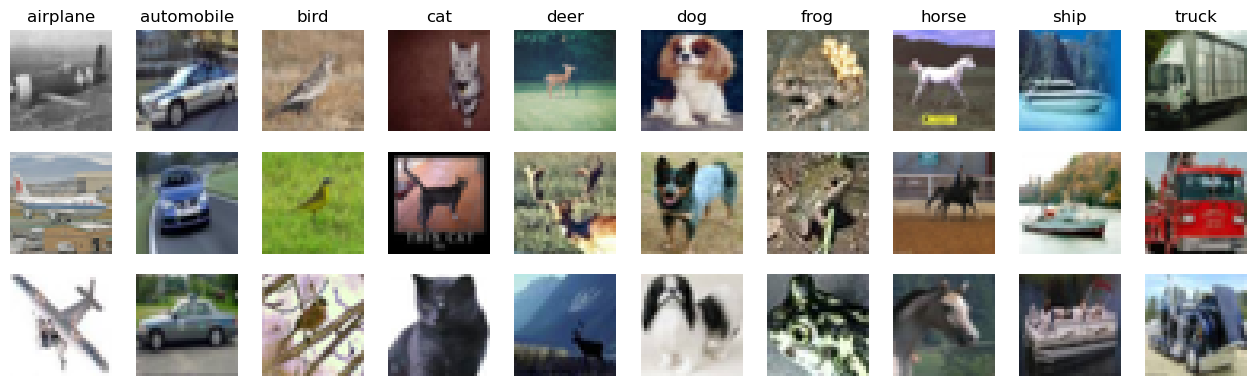

In [3]:
from Custom import PlotRandomFromEachClass

cifar_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
PlotRandomFromEachClass(X_train, y_train, 3, labels=cifar_labels)

##### **Preparing the dataset**
Just like the MNIST dataset we normalize the images to [0,1] and transform the class indices to one-hot encoded vectors.

In [4]:
from tensorflow.keras.utils import to_categorical

# Transform label indices to one-hot encoded vectors
y_train_c = to_categorical(y_train, num_classes=10)
y_test_c  = to_categorical(y_test , num_classes=10)

# Normalization of pixel values (to [0-1] range)
X_train = X_train.astype('float32') / 255
X_test  = X_test.astype('float32')  / 255

### **2. Fully connected classifier**
We will start by creating a fully connected classifier using the ```Dense``` layer. We give you the first layer that flattens the image features to a single vector. Add the remaining layers to the network.

Consider what the size of the output must be and what activation function you should use in the output layer.

In [5]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten

x_in = Input(shape=X_train.shape[1:])
x = Flatten()(x_in)

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

x = Dense(1024, activation='tanh')(x)
x = Dense(1024, activation='tanh')(x)
x = Dense(10, activation='softmax')(x)

# ============================================

model = Model(inputs=x_in, outputs=x)

# Now we build the model using Stochastic Gradient Descent with Nesterov momentum. We use accuracy as the metric.
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary(100)

2024-02-14 09:23:08.677367: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-14 09:23:08.677763: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-02-14 09:23:08.678889: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0001:00:00.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2024-02-14 09:23:08.678924: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-02-14 09:23:08.678955: I tensorflow/stream_executor/platform/default/dso_loa

Model: "model"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_1 (InputLayer)                         [(None, 32, 32, 3)]                     0              
____________________________________________________________________________________________________
flatten (Flatten)                            (None, 3072)                            0              
____________________________________________________________________________________________________
dense (Dense)                                (None, 1024)                            3146752        
____________________________________________________________________________________________________
dense_1 (Dense)                              (None, 1024)                            1049600        
____________________________________________________________________________

##### **Training the model**
In order to show the differences between models in the first parts of the assignment, we will restrict the training to the following command using 15 epochs, batch size 32, and 20% validation data. From section 5 and forward you can change this as you please to increase the accuracy, but for now stick with this command.

In [6]:
history = model.fit(X_train,y_train_c, epochs=15, batch_size=32, verbose=1, validation_split=0.2)

2024-02-14 09:23:35.553921: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-02-14 09:23:35.626798: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2596995000 Hz


Epoch 1/15


2024-02-14 09:23:40.821192: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


1250/1250 [==============================] - 14s 5ms/step - loss: 2.0470 - accuracy: 0.3015 - val_loss: 1.7242 - val_accuracy: 0.3828
Epoch 2/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6745 - accuracy: 0.4030 - val_loss: 1.6597 - val_accuracy: 0.4113
Epoch 3/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5838 - accuracy: 0.4380 - val_loss: 1.7070 - val_accuracy: 0.4175
Epoch 4/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5391 - accuracy: 0.4508 - val_loss: 1.5889 - val_accuracy: 0.4406
Epoch 5/15
1250/1250 [==============================] - 6s 4ms/step - loss: 1.4900 - accuracy: 0.4677 - val_loss: 1.5855 - val_accuracy: 0.4459
Epoch 6/15
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4564 - accuracy: 0.4807 - val_loss: 1.5695 - val_accuracy: 0.4519
Epoch 7/15
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4373 - accuracy: 0.4854 - val_loss: 1.5953 - val_accuracy: 0.4379
Ep

##### **Evaluating the model**
We use ```model.evaluate``` to get the loss and metric scores on the test data. To plot the results we give you a custom function that does the work for you.

In [7]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 1.511
Test accuracy = 0.478


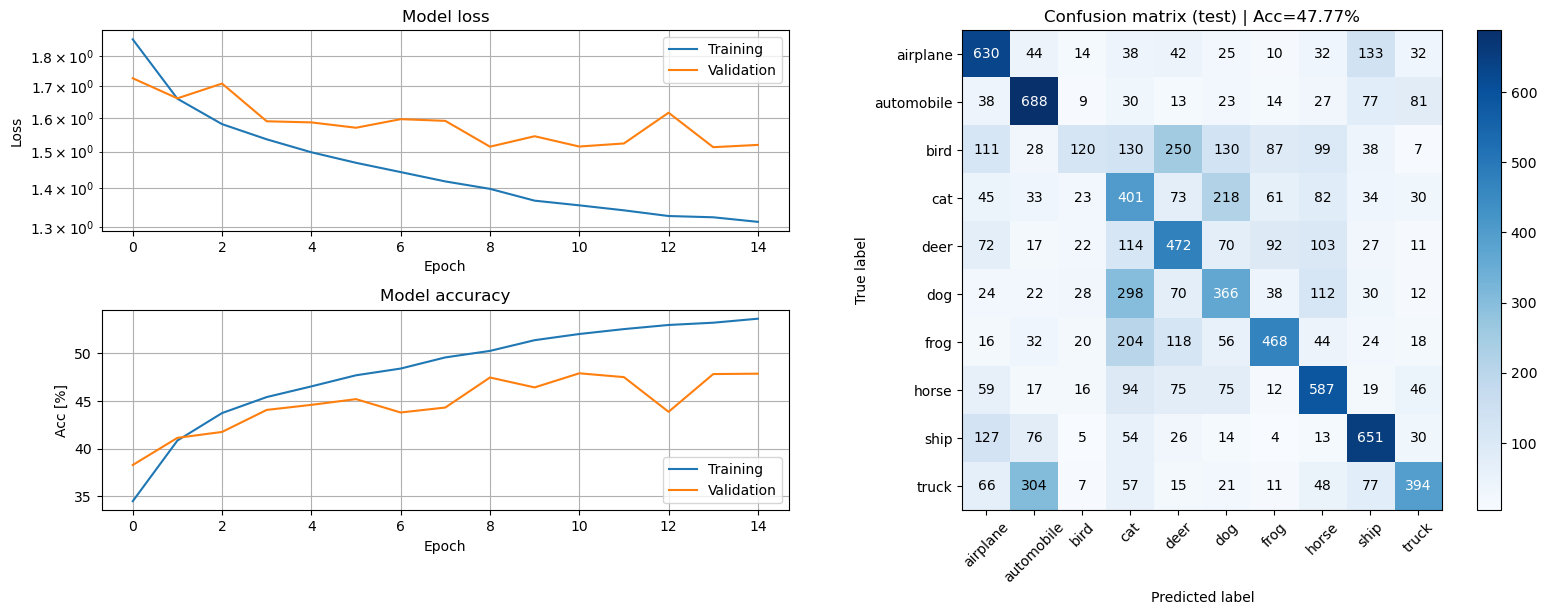

In [8]:
from Custom import PlotModelEval

# Custom function for evaluating the model and plotting training history
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 2:</span>**
Train a model that achieves above 45% accuracy on the test data. Provide a (short) motivation of your model architecture and briefly discuss the results. 

#### **<span style="color:green">Answer:</span>**

The model consists of two hidden layers, each with 1024 nodes. Different numbers of nodes were tested until an accuracy of 45% was achieved. The training loss decreases over epochs, which is expected. The validation loss also decreases and then fluctuates, which may indicate that the model is beginning to overfit to the training data. The validation accuracy increases over epochs but reach a plateau, which may indicate that the model starts to reach its generalization limit for the current architecture.

#### **<span style="color:red">Question 3:</span>**
Compare this model to the one you used for the MNIST dataset in the first assignment, in terms of size and test accuracy. Why do you think this dataset is much harder to classify than the MNIST handwritten digits?

#### **<span style="color:green">Answer:</span>**

This model consists of significantly more nodes and an extra hidden layer. CIFAR is a much more complex dataset in the sense that the variations of the objects are larger and also has a one more dimension which determines the colors (RGB). It is therefore reasonable to assume that it is more difficult to find clear recurring patterns in the same way as it is possible to do in the MNIST dataset.

### **3. CNN classifier**
We will now move on to a network architecture that is more suited for this problem, the convolutional neural network. The new layers you will use are ```Conv2D``` and ```MaxPooling2D```, which you can find the documentation of here https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D and here https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D.

##### **Creating the CNN model**

A common way to build convolutional neural networks is to create blocks of layers of the form **[convolution - activation - pooling]**, and then stack several of these block to create the full convolution stack. This is often followed by a fully connected network to create the output classes. Use this recipe to build a CNN that acheives at least 62% accuracy on the test data.

*Side note. Although this is a common way to build CNNs, it is be no means the only or even best way. It is a good starting point, but later in part 5 you might want to explore other architectures to acheive even better performance.*

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

x_in = Input(shape=X_train.shape[1:])

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Block 1
x = Conv2D(32, (3, 3), padding='same', activation = "relu")(x_in) # stride is 1x1 by default
x = MaxPooling2D(pool_size=(2, 2))(x) # stride size is default to pool size

# Block 2
x = Conv2D(64, (3, 3), padding='same', activation = "relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Block 3
x = Conv2D(128, (3, 3), padding='same', activation = "relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Block 4
x = Conv2D(256, (3, 3), padding='same', activation = "relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten()(x)

# Fully connected layer

x = Dense(256, activation='relu')(x)

x = Dense(10, activation='softmax')(x)

# ============================================

model = Model(inputs=x_in, outputs=x)

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)

Model: "model_1"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_2 (InputLayer)                         [(None, 32, 32, 3)]                     0              
____________________________________________________________________________________________________
conv2d (Conv2D)                              (None, 32, 32, 32)                      896            
____________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)                 (None, 16, 16, 32)                      0              
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                            (None, 16, 16, 64)                      18496          
__________________________________________________________________________

##### **Training the CNN**

In [10]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15


2024-02-14 09:26:55.729031: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2024-02-14 09:27:07.811434: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2024-02-14 09:27:07.834377: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1250/1250 [==============================] - 29s 10ms/step - loss: 1.8918 - accuracy: 0.2959 - val_loss: 1.2652 - val_accuracy: 0.5579
Epoch 2/15
1250/1250 [==============================] - 11s 9ms/step - loss: 1.1757 - accuracy: 0.5782 - val_loss: 1.0374 - val_accuracy: 0.6261
Epoch 3/15
1250/1250 [==============================] - 11s 8ms/step - loss: 0.9319 - accuracy: 0.6735 - val_loss: 0.8980 - val_accuracy: 0.6889
Epoch 4/15
1250/1250 [==============================] - 11s 9ms/step - loss: 0.7683 - accuracy: 0.7305 - val_loss: 0.8648 - val_accuracy: 0.7035
Epoch 5/15
1250/1250 [==============================] - 11s 8ms/step - loss: 0.6317 - accuracy: 0.7779 - val_loss: 0.9669 - val_accuracy: 0.6767
Epoch 6/15
1250/1250 [==============================] - 11s 9ms/step - loss: 0.5323 - accuracy: 0.8129 - val_loss: 0.8764 - val_accuracy: 0.7162
Epoch 7/15
1250/1250 [==============================] - 11s 8ms/step - loss: 0.4521 - accuracy: 0.8403 - val_loss: 0.9026 - val_accuracy: 0.

##### **Evaluating the CNN**

In [11]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 1.373
Test accuracy = 0.697


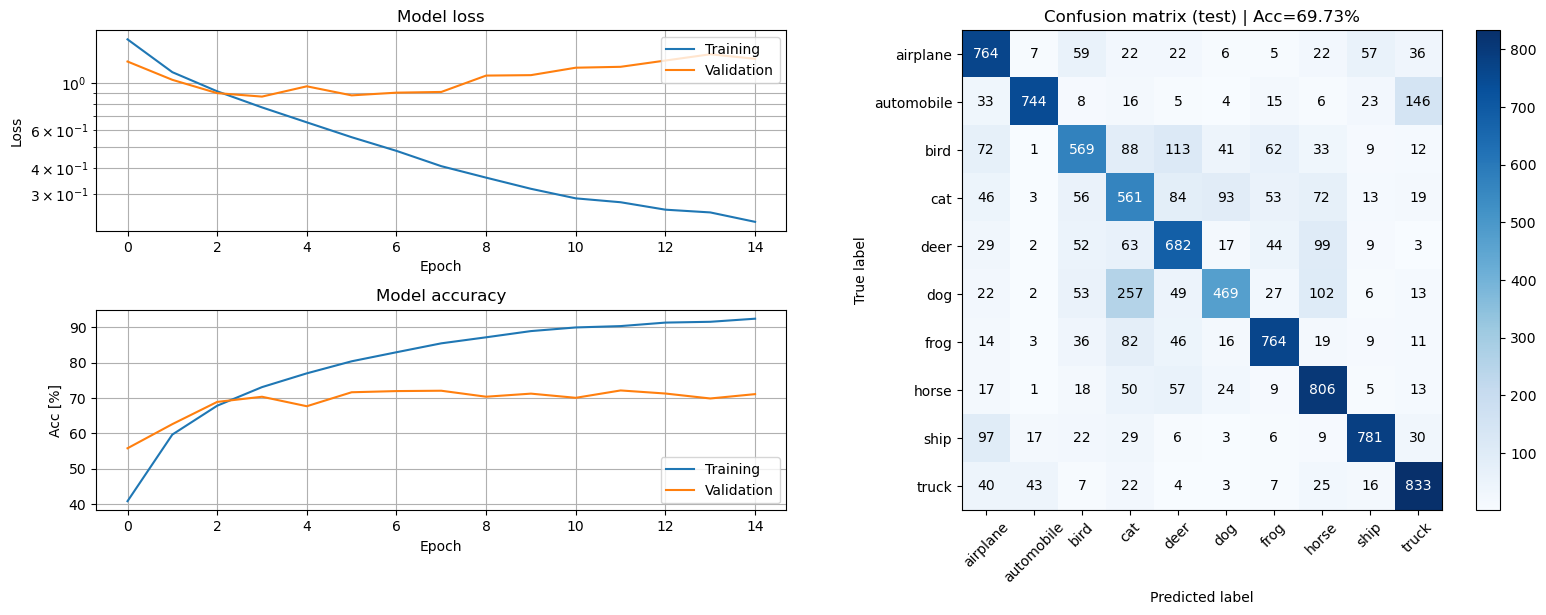

In [12]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 4:</span>**
Train a model that achieves at least 62% test accuracy. Provide a (short) motivation of your model architecture and briefly discuss the results.

#### **<span style="color:green">Answer:</span>**
The model consists of four blocks where the number of filters is doubled for each block. The idea behind it is that the first blocks capture simpler patterns while the subsequent ones capture more complex patterns and therefore reasonably require more filters. Padding is set to "same" to preserve the dimension after filtering, stride is 1x1 by default. In pooling, pool_size is set to 2x2, the stride is the same with pool_size by default hence the pooling operation halves the width and height of the image. Number of filters in each layer is a power of 2 since it results in more efficient processing and filter size is selected as 3 from the literature research. ReLU activation function is used to prevent vanishing gradient problem and it is the most common activation function recently.

The training loss steady decrease, suggesting that the model is learning the training images over epochs. The validation loss does not decrease as much and appears to plateau after about 6 epochs, indicating possible overfitting or that the model has reached its performance limit.

#### **<span style="color:red">Question 5:</span>**
Compare this model with the previous fully connected model. You should find that this one is much more efficient, i.e. achieves higher accuracy with fewer parameters. Explain in your own words how this is possible.

#### **<span style="color:green">Answer:</span>**
Number of free parameters in a fully connected neural network is 4,206,602 whereas in CNN it is 653,386. The reason why CNN achieves higher accuracy with fewer parameters is the "local receptive fields". In a fully connected neural network, each input connected to hidden layer but in CNN only a small region of input is connected to hidden layer.

### **4. Regularization**

#### **4.1 Dropout**
You have probably seen that your CNN model overfits the training data. One way to prevent this is to add ```Dropout``` layers to the model, that randomly "drops" hidden nodes each training-iteration by setting their output to zero. Thus the model cannot rely on a small set of very good hidden features, but must instead learns to use different sets of hidden features each time. Dropout layers are usually added after the pooling layers in the convolution part of the model, or after activations in the fully connected part of the model.

*Side note. In the next assignment you will work with Ensemble models, a way to use the output from several individual models to achieve higher performance than each model can achieve on its own. One way to interpret Dropout is that each random selection of nodes is a separate model that is trained only on the current iteration. The final output is then the average of outputs from all the individual models. In other words, Dropout can be seen as a way to build ensembling directly into the network, without having to train several models explicitly.*

Extend your previous model with the Dropout layer and test the new performance.

In [1]:
import num
a = [1,2,3]
np.sd(a)

NameError: name 'np' is not defined

In [13]:
from tensorflow.keras.layers import Dropout

x_in = Input(shape=X_train.shape[1:])

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Block 1
x = Conv2D(32, (3, 3), padding='same', activation = "relu")(x_in)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)

# Block 2
x = Conv2D(64, (3, 3), padding='same', activation = "relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)

# Block 3
x = Conv2D(128, (3, 3), padding='same', activation = "relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)

# Block 4
x = Conv2D(256, (3, 3), padding='same', activation = "relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)

x = Flatten()(x)

# Fully connected layer
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)

x = Dense(10, activation='softmax')(x)

# ============================================

model = Model(inputs=x_in, outputs=x)

# Compile model
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)

Model: "model_2"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_3 (InputLayer)                         [(None, 32, 32, 3)]                     0              
____________________________________________________________________________________________________
conv2d_4 (Conv2D)                            (None, 32, 32, 32)                      896            
____________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)               (None, 16, 16, 32)                      0              
____________________________________________________________________________________________________
dropout (Dropout)                            (None, 16, 16, 32)                      0              
__________________________________________________________________________

In [14]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 12s 10ms/step - loss: 2.0374 - accuracy: 0.2353 - val_loss: 1.4520 - val_accuracy: 0.4659
Epoch 2/15
1250/1250 [==============================] - 12s 9ms/step - loss: 1.4713 - accuracy: 0.4652 - val_loss: 1.3294 - val_accuracy: 0.5219
Epoch 3/15
1250/1250 [==============================] - 12s 9ms/step - loss: 1.2552 - accuracy: 0.5519 - val_loss: 1.0619 - val_accuracy: 0.6278
Epoch 4/15
1250/1250 [==============================] - 12s 9ms/step - loss: 1.1293 - accuracy: 0.5973 - val_loss: 0.9445 - val_accuracy: 0.6667
Epoch 5/15
1250/1250 [==============================] - 12s 9ms/step - loss: 1.0334 - accuracy: 0.6346 - val_loss: 0.9213 - val_accuracy: 0.6762
Epoch 6/15
1250/1250 [==============================] - 12s 9ms/step - loss: 0.9614 - accuracy: 0.6584 - val_loss: 0.8806 - val_accuracy: 0.6927
Epoch 7/15
1250/1250 [==============================] - 12s 9ms/step - loss: 0.9078 - accuracy: 0.6792 - val_loss: 0.8275 - val_a

In [15]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 0.721
Test accuracy = 0.750


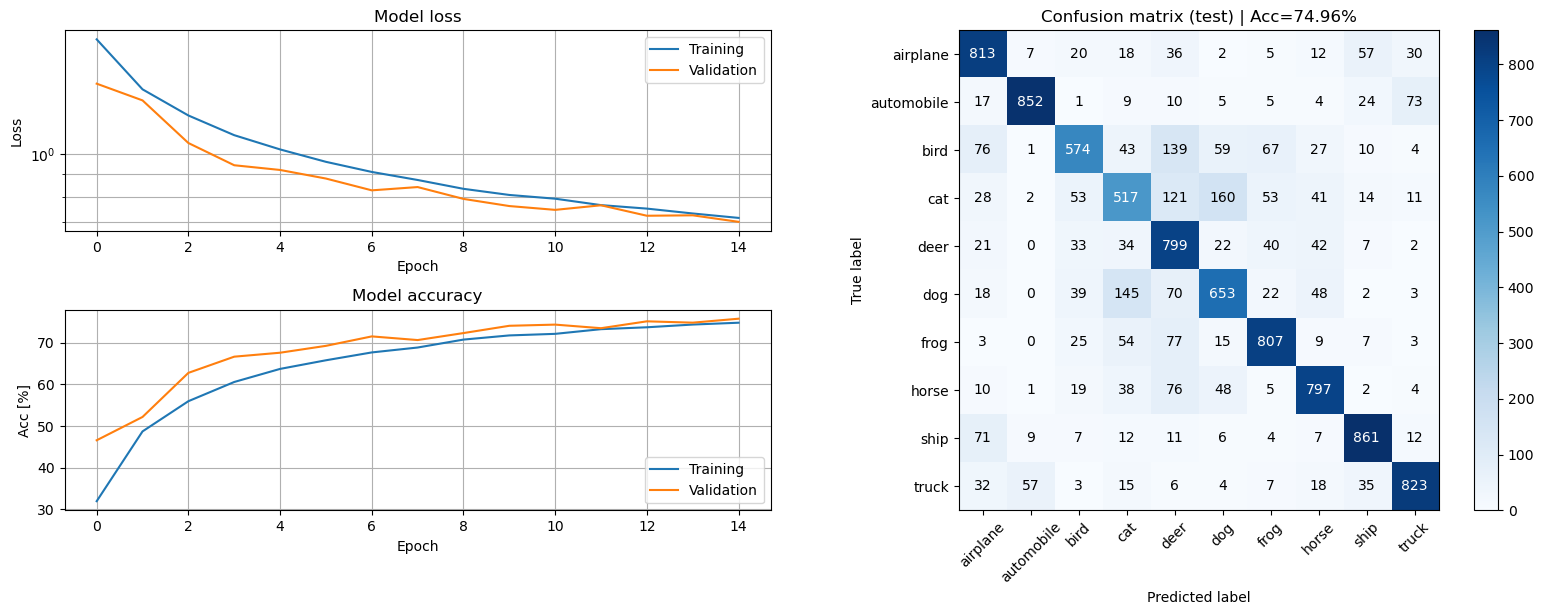

In [16]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 6:</span>**
Compare this model and the previous in terms of the training accuracy, validation accuracy, and test accuracy. Explain the similarities and differences (remember that the only difference between the models should be the addition of Dropout layers).

Hint: what does the dropout layer do at test time?

#### **<span style="color:green">Answer:</span>**
The training, validation and test accuracy very is similar (around 70%). This model generate a random sub-network by randomly dropping units and the gradient is only updates the parameters that are present in the network and this process is being done iteratively until a stopping condition. Number of trainable parameters is the same. This model is less likely to overfit and generalizes better. 

We use the full network in the test time but each estimated parameter going out from a unit is multiplied by the probability of that unit being kept during training. 

#### **4.2 Batch normalization**
The final layer we will explore is ```BatchNormalization```. As the name suggests, this layer normalizes the data in each batch to have a specific mean and standard deviation, which is learned during training. The reason for this is quite complicated (and still debated among the experts), but suffice to say that it helps the optimization converge faster which means we get higher performance in fewer epochs. The normalization is done separatly for each feature, i.e. the statistics are calculated accross the batch dimension of the input data. The equations for batch-normalizing one feature are the following, where $N$ is the batch size, $x$ the input features, and $y$ the normalized output features:

$$ \mu = \frac{1}{N} \sum_{i=0}^{N}x_i,\;\;\;\; \sigma^2 = \frac{1}{N} \sum_{i=0}^{N}(x_i - \mu)^2 $$

$$ \hat{x}_i = \frac{x_i - \mu}{\sqrt{\sigma^2 + \epsilon}} $$

$$ y_i = \gamma \hat{x}_i + \beta $$

At first glance this might look intimidating, but all it means is that we begin by scaling and shifting the data to have mean $\mu=0$ and standard deviation $\sigma=1$. After this we use the learnable parameters $\gamma$ and $\beta$ to decide the width and center of the final distribution. $\epsilon$ is a small constant value that prevents the denominator from being zero.

In addition to learning the parameters $\gamma$ and $\beta$ by gradient decent just like the weights, Batch Normalization also keeps track of the running average of minibatch statistics $\mu$ and $\sigma$. These averages are used to normalize the test data. We can tune the rate at which the running averages are updated with the *momentum* parameter of the BatchNormalization layer. A large momentum means that the statistics converge more slowly and therefore requires more updates before it represents the data. A low momentum, on the other hand, adapts to the data more quickly but might lead to unstable behaviour if the latest minibatches are not representative of the whole dataset. For this test we recommend a momentum of 0.75, but you probably want to change this when you design a larger network in Section 5.

The batch normalization layer should be added after the hidden layer linear transformation, but before the nonlinear activation. This means that we cannot specify the activation funciton in the ```Conv2D``` or ```Dense``` if we want to batch-normalize the output. We therefore need to use the ```Activation``` layer to add a separate activation to the network stack after batch normalization. For example, the convolution block will now look like **[conv - batchnorm - activation - pooling]**.

Extend your previous model with batch normalization, both in the convolution and fully connected part of the model.

In [17]:
from tensorflow.keras.layers import BatchNormalization, Activation

x_in = Input(shape=X_train.shape[1:])

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Block 1
x = Conv2D(32, (3, 3), padding='same')(x_in)
x = BatchNormalization(momentum=0.75)(x) 
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)

# Block 2
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization(momentum=0.75)(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)

# Block 3
x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization(momentum=0.75)(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)

# Block 4
x = Conv2D(256, (3, 3), padding='same')(x)
x = BatchNormalization(momentum=0.75)(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)

x = Flatten()(x)

# Fully connected layer
x = Dense(256)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)

x = Dense(10, activation='softmax')(x)

# ============================================

model = Model(inputs=x_in, outputs=x)

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)

Model: "model_3"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_4 (InputLayer)                         [(None, 32, 32, 3)]                     0              
____________________________________________________________________________________________________
conv2d_8 (Conv2D)                            (None, 32, 32, 32)                      896            
____________________________________________________________________________________________________
batch_normalization (BatchNormalization)     (None, 32, 32, 32)                      128            
____________________________________________________________________________________________________
activation (Activation)                      (None, 32, 32, 32)                      0              
__________________________________________________________________________

In [18]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 25s 18ms/step - loss: 1.7120 - accuracy: 0.3862 - val_loss: 1.2269 - val_accuracy: 0.5531
Epoch 2/15
1250/1250 [==============================] - 19s 16ms/step - loss: 1.2096 - accuracy: 0.5641 - val_loss: 0.9759 - val_accuracy: 0.6538
Epoch 3/15
1250/1250 [==============================] - 19s 15ms/step - loss: 1.0281 - accuracy: 0.6337 - val_loss: 0.9204 - val_accuracy: 0.6748
Epoch 4/15
1250/1250 [==============================] - 18s 15ms/step - loss: 0.9281 - accuracy: 0.6734 - val_loss: 0.7898 - val_accuracy: 0.7158
Epoch 5/15
1250/1250 [==============================] - 18s 15ms/step - loss: 0.8677 - accuracy: 0.6940 - val_loss: 0.7452 - val_accuracy: 0.7391
Epoch 6/15
1250/1250 [==============================] - 18s 15ms/step - loss: 0.7951 - accuracy: 0.7191 - val_loss: 0.7218 - val_accuracy: 0.7431
Epoch 7/15
1250/1250 [==============================] - 18s 15ms/step - loss: 0.7575 - accuracy: 0.7309 - val_loss: 0.7016 -

In [19]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 0.622
Test accuracy = 0.787


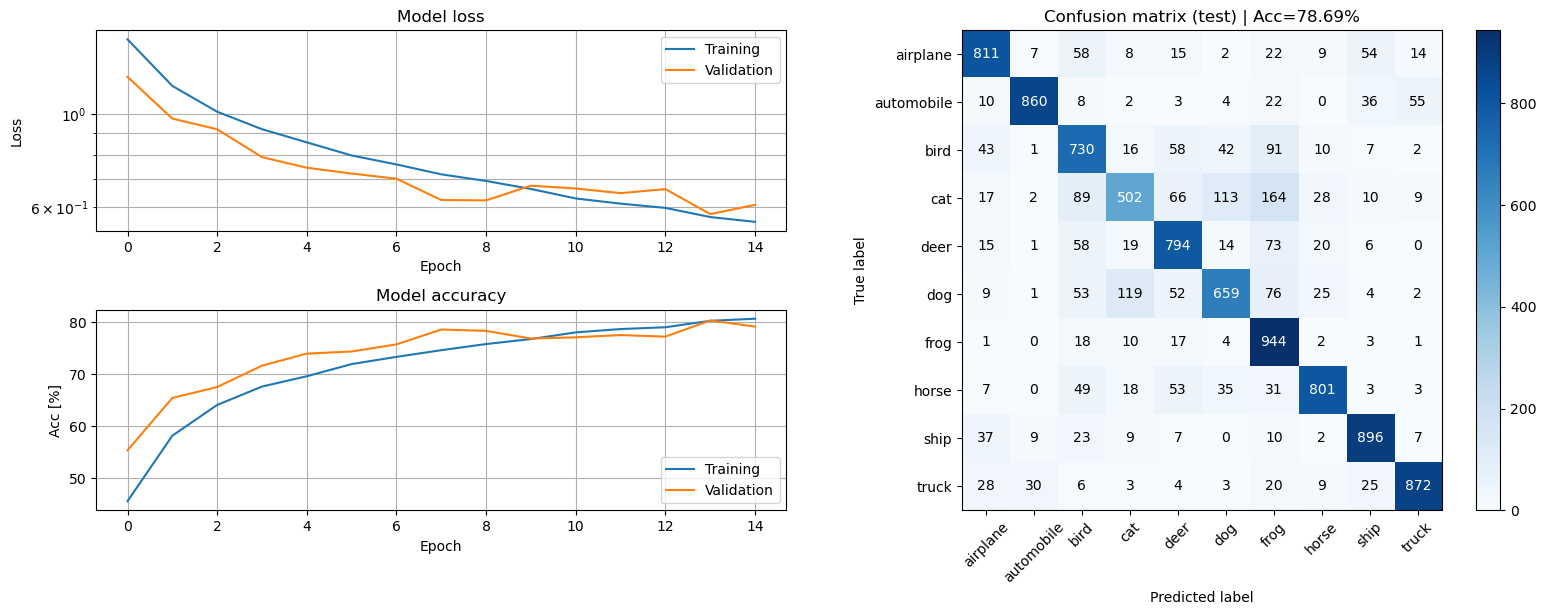

In [20]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 7:</span>**
When using BatchNorm one must take care to select a good minibatch size. Describe what problems might arise if:

1. The minibatch size is too small.
2. The minibatch size is too large.

You can reason about this given the description of BatchNorm above, or you can search for the information in other sources. Do not forget to provide links to the sources if you do!

#### **<span style="color:green">Answer:</span>**
If the minibatch size is too small, the statistics (mean and variance) does not represent the population which might result in unstable training and if the minibatch size is too large, it leads to slower convergence.

### **5. Putting it all together**
We now want you to create your own model based on what you have learned. We want you to experiment and see what works and what doesn't, so don't go crazy with the number of epochs until you think you have something that works.

To pass this assignment, we want you to acheive **75%** accuracy on the test data in no more than **25 epochs**. This is possible using the layers and techniques we have explored in this notebook, but you are free to use any other methods that we didn't cover. (You are obviously not allowed to cheat, for example by training on the test data.)

Model: "model_5"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_6 (InputLayer)                         [(None, 32, 32, 3)]                     0              
____________________________________________________________________________________________________
conv2d_16 (Conv2D)                           (None, 32, 32, 32)                      896            
____________________________________________________________________________________________________
batch_normalization_10 (BatchNormalization)  (None, 32, 32, 32)                      128            
____________________________________________________________________________________________________
activation_10 (Activation)                   (None, 32, 32, 32)                      0              
__________________________________________________________________________

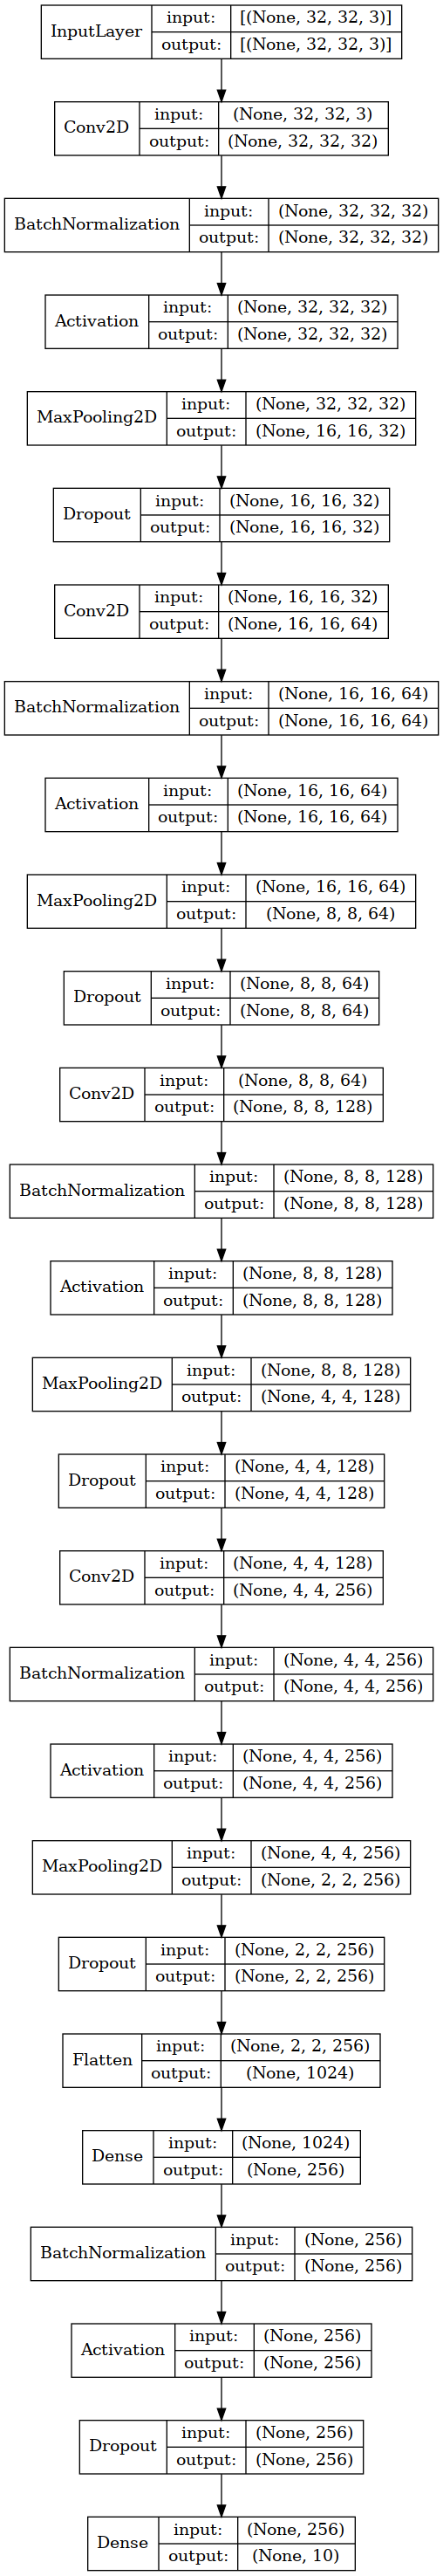

In [23]:
from tensorflow.keras.utils import plot_model

x_in = Input(shape=X_train.shape[1:])

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Block 1
x = Conv2D(32, (3, 3), padding='same')(x_in)
x = BatchNormalization(momentum = 0.75)(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.1)(x)

# Block 2
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization(momentum = 0.75)(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.1)(x)

# Block 3
x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization(momentum = 0.75)(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.1)(x)

# Block 4
x = Conv2D(256, (3, 3), padding='same')(x)
x = BatchNormalization(momentum = 0.75)(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)

x = Flatten()(x)

# Fully connected layer
x = Dense(256)(x)
x = BatchNormalization(momentum = 0.75)(x)
x = Activation('relu')(x)
x = Dropout(0.25)(x)

x = Dense(10, activation='softmax')(x)

# ============================================

model = Model(inputs=x_in, outputs=x)

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)
plot_model(model, show_shapes=True, show_layer_names=False)

In [24]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=25, verbose=1, validation_split=0.2)

Epoch 1/25
1250/1250 [==============================] - 22s 17ms/step - loss: 1.7068 - accuracy: 0.3878 - val_loss: 1.1901 - val_accuracy: 0.5841
Epoch 2/25
1250/1250 [==============================] - 19s 15ms/step - loss: 1.1536 - accuracy: 0.5834 - val_loss: 1.2088 - val_accuracy: 0.5774
Epoch 3/25
1250/1250 [==============================] - 19s 15ms/step - loss: 0.9756 - accuracy: 0.6515 - val_loss: 0.7856 - val_accuracy: 0.7214
Epoch 4/25
1250/1250 [==============================] - 19s 15ms/step - loss: 0.8694 - accuracy: 0.6940 - val_loss: 0.7305 - val_accuracy: 0.7461
Epoch 5/25
1250/1250 [==============================] - 18s 15ms/step - loss: 0.8032 - accuracy: 0.7153 - val_loss: 0.7031 - val_accuracy: 0.7556
Epoch 6/25
1250/1250 [==============================] - 19s 15ms/step - loss: 0.7242 - accuracy: 0.7446 - val_loss: 0.6446 - val_accuracy: 0.7775
Epoch 7/25
1250/1250 [==============================] - 19s 15ms/step - loss: 0.6740 - accuracy: 0.7593 - val_loss: 0.6731 -

In [25]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 0.589
Test accuracy = 0.821


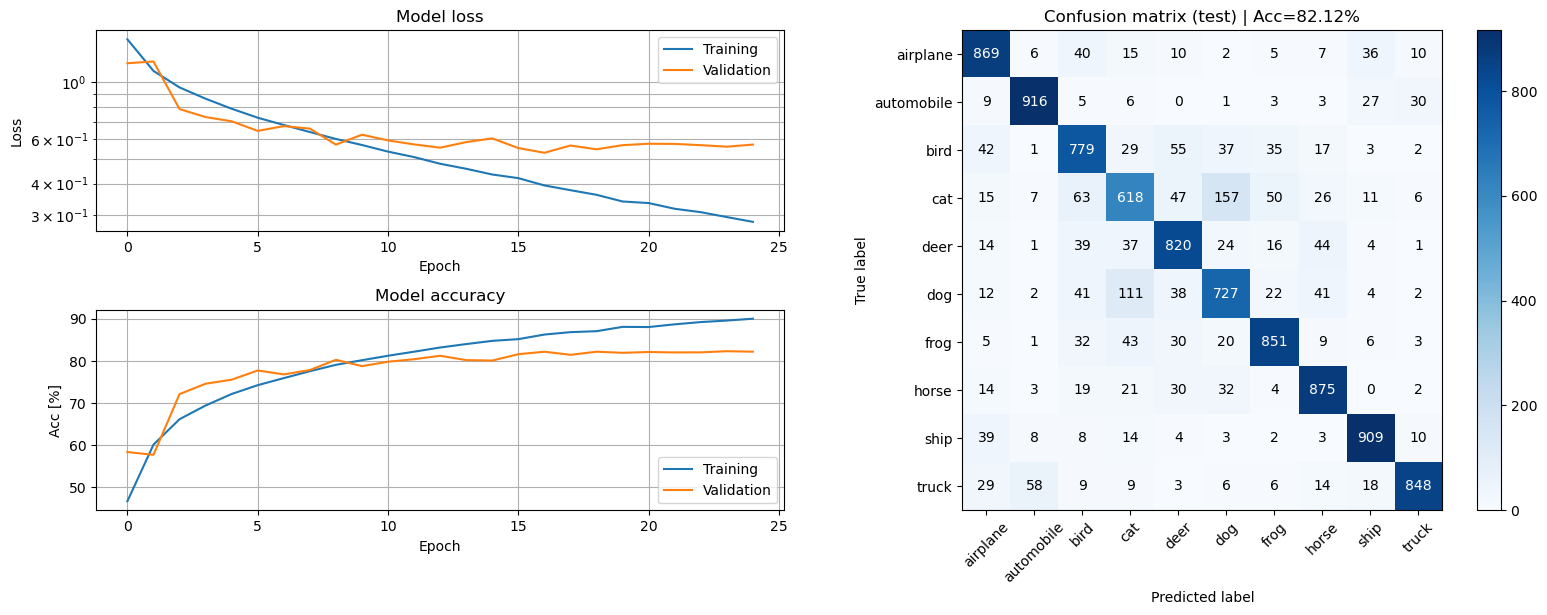

In [26]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 8:</span>**
Design and train a model that achieves at least 75% test accuracy in at most 25 epochs. Explain your model architecture and motivate the design choices you have made.

#### **<span style="color:green">Answer:</span>**

We used a model with four blocks where the number of filters is doubled for each block. We used batch normalization with momentum 0.75 to stabilize and speed up training and dropout with different values to prevent overfitting. ReLU activation function is used to avoid vanishing gradient problem. The model performs well and we get a 82.1% test accuracy. The training reached to its optimal around 10 epoch, we don't observe much improvement in the validation data after 10 epoch.

---

### **Want some extra challenge?**
For those of you that want to get creative, here are some things to look into. But note that we don't have the answers here. Any of these might improve the performance, or might not, or it might only work in combination with each other. This is up to you to figure out. This is how deep learning research often happens, trying things in a smart way to see what works best.
* Tweak or change the optimizer or training parameters.
* Tweak the filter parameters, such as numbers and sizes of filters.
* Use other activation functions.
* Add L1/L2 regularization (see https://www.tensorflow.org/api_docs/python/tf/keras/regularizers)
* Include layers that we did not cover here (see https://www.tensorflow.org/api_docs/python/tf/keras/layers). For example, our best model uses the global pooling layers.
* Take inspiration from some well-known architectures, such as ResNet or VGG16. (But don't just copy-paste those architectures. For one, what's the fun in that? Also, they take a long time to train, you will not have time.)
* Use explicit model ensembing (training multiple models that vote on or average the outputs - this will also take a lot of time.)
* Use data augmentation to create a larger training set (see https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).

In [ ]:

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

x_in = Input(shape=X_train.shape[1:])

x = ???

model = Model(inputs=x_in, outputs=x)

# You can also change this if you want
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

# Print the summary and model image
model.summary(100)
plot_model(model, show_shapes=True, show_layer_names=False)

# ============================================


In [ ]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=5, verbose=1, validation_split=0.2)

In [ ]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)